In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("airbnb_sample.csv")

In [5]:
df

,listing_id,city,neighborhood,latitude,longitude,property_type,price,number_of_reviews,review_scores_rating,host_is_superhost,amenities_count,response_time,minimum_nights,availability_365,last_review_date,month
0,AB1000,Chicago,Beachside,41.983671,-87.807683,Condo,371.57,56,83.4,0,29,within an hour,21,112,2024-04-18,4
1,AB1001,New York,Beachside,40.614840,-74.047520,Apartment,347.09,38,96.0,0,6,within an hour,26,113,2024-04-07,4
2,AB1002,Chicago,Beachside,41.806160,-87.599479,Condo,175.97,108,61.8,0,19,within an hour,14,221,2024-08-02,8
3,AB1003,Chicago,Suburb,41.970287,-87.937205,Loft,479.69,180,71.2,0,15,within an hour,4,165,2024-10-19,10
4,AB1004,New York,Suburb,40.751156,-73.962332,House,382.05,41,98.0,0,12,a few days,22,318,2024-03-15,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,AB1095,New York,Uptown,40.604091,-74.138602,House,181.94,142,70.3,1,23,a few days,15,277,2024-02-13,2
96,AB1096,New York,Suburb,40.904893,-73.774143,Condo,197.90,158,78.4,1,10,a few days,18,234,2024-10-31,10
97,AB1097,Chicago,Beachside,41.907926,-87.769812,Condo,352.63,0,99.2,0,5,within an hour,2,3,2024-01-17,1
98,AB1098,New York,Uptown,40.636355,-74.079666,House,388.57,116,79.7,0,27,within a day,22,153,2024-11-25,11


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   listing_id            100 non-null    object 
 1   city                  100 non-null    object 
 2   neighborhood          100 non-null    object 
 3   latitude              100 non-null    float64
 4   longitude             100 non-null    float64
 5   property_type         100 non-null    object 
 6   price                 100 non-null    float64
 7   number_of_reviews     100 non-null    int64  
 8   review_scores_rating  100 non-null    float64
 9   host_is_superhost     100 non-null    int64  
 10  amenities_count       100 non-null    int64  
 11  response_time         100 non-null    object 
 12  minimum_nights        100 non-null    int64  
 13  availability_365      100 non-null    int64  
 14  last_review_date      100 non-null    object 
 15  month                 10

In [9]:
df.describe()

,latitude,longitude,price,number_of_reviews,review_scores_rating,host_is_superhost,amenities_count,minimum_nights,availability_365,month
count,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,38.662999,-94.207795,278.747700,111.17000,82.420000,0.120000,15.950000,17.720000,184.820000,6.360000
std,3.503972,19.012332,133.377827,57.32189,11.728908,0.326599,7.497306,8.221774,105.156005,3.494642
min,33.726473,-118.647286,54.880000,0.00000,60.600000,0.000000,5.000000,1.000000,1.000000,1.000000
25%,34.183866,-118.225522,176.897500,59.25000,73.975000,0.000000,9.000000,11.000000,94.000000,3.750000
50%,40.660716,-87.776760,286.445000,125.00000,82.850000,0.000000,15.000000,19.000000,198.000000,6.000000
75%,41.736981,-74.083558,388.812500,162.25000,93.550000,0.000000,22.000000,24.000000,268.000000,10.000000
max,42.019235,-73.748936,495.730000,199.00000,100.000000,1.000000,30.000000,30.000000,365.000000,12.000000


In [13]:
df.isnull().sum()

listing_id              0
city                    0
neighborhood            0
latitude                0
longitude               0
property_type           0
price                   0
number_of_reviews       0
review_scores_rating    0
host_is_superhost       0
amenities_count         0
response_time           0
minimum_nights          0
availability_365        0
last_review_date        0
month                   0
dtype: int64

In [15]:
df['city'].value_counts()

city
Los Angeles    36
New York       33
Chicago        31
Name: count, dtype: int64

In [19]:
df['property_type'].value_counts()

property_type
Condo        31
House        26
Apartment    22
Loft         21
Name: count, dtype: int64

In [21]:
df['response_time'].value_counts()

response_time
a few days        36
within an hour    33
within a day      31
Name: count, dtype: int64

### PRICING BY CITY

In [24]:
#Average price by city
df.groupby('city')['price'].mean()

city
Chicago        283.288065
Los Angeles    256.492778
New York       298.760606
Name: price, dtype: float64

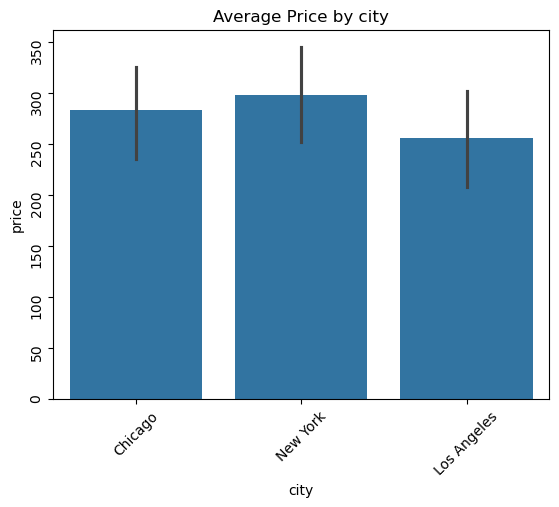

In [50]:
sns.barplot(x='city',y='price',data=df)
plt.title('Average Price by city')
plt.xticks(rotation=45)
plt.yticks(rotation=90)
plt.show()

### PRICING BY PROPERTY TYPE

In [33]:
#Average price by property type
df.groupby('property_type')['price'].mean()

property_type
Apartment    274.288636
Condo        246.756452
House        281.956154
Loft         326.671905
Name: price, dtype: float64

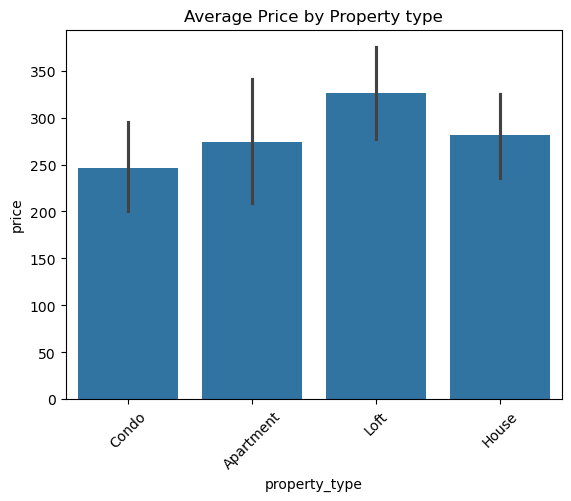

In [46]:
sns.barplot(x='property_type', y= 'price',data=df)
plt.title('Average Price by Property type')
plt.xticks(rotation=45)
plt.show()

### PRICING BY REVIEWS

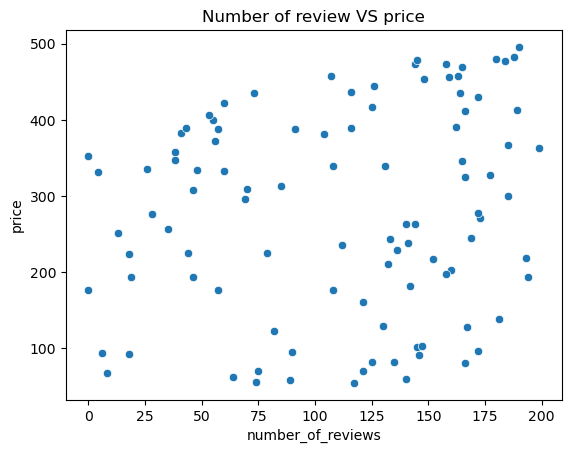

In [55]:
sns.scatterplot(x='number_of_reviews',y='price',data=df)
plt.title('Number of review VS price')
plt.show()

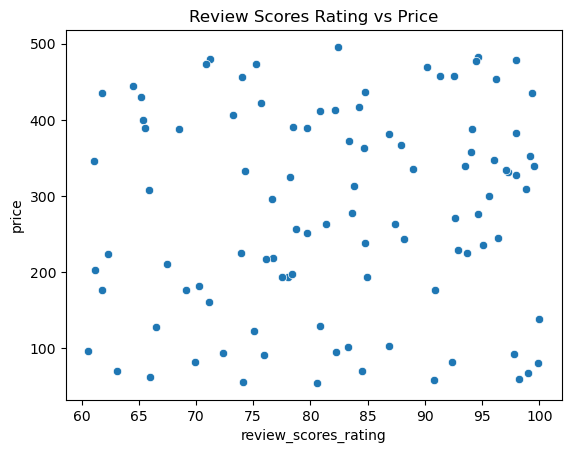

In [57]:
sns.scatterplot(x='review_scores_rating', y='price', data=df)
plt.title('Review Scores Rating vs Price')
plt.show()

### Run Regression Model to Find Pricing Predictors

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [66]:

# 2. Select features (X) and target (y)
X = df[['number_of_reviews']]    # You can add more columns here later
y = df['price']

# 3. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# 5. Test the model
print("Model Accuracy (R²):", model.score(X_test, y_test))

# 6. Predict new prices
predicted_prices = model.predict(X_test)

# Show some predictions
print(predicted_prices[:5])

Model Accuracy (R²): 0.06535451000270776
[259.74485375 281.67731588 278.06817654 299.16776037 251.97132286]
